In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/cancer_classification.csv')

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

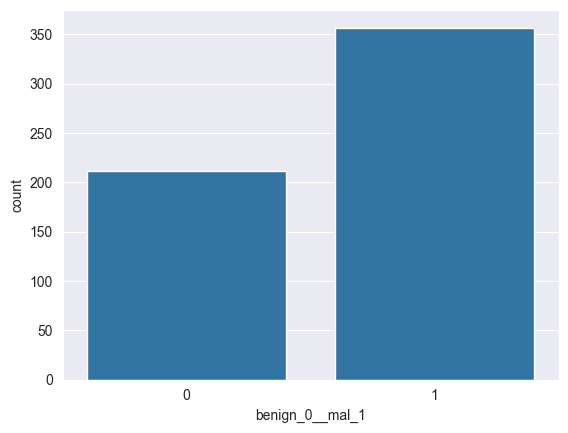

In [4]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

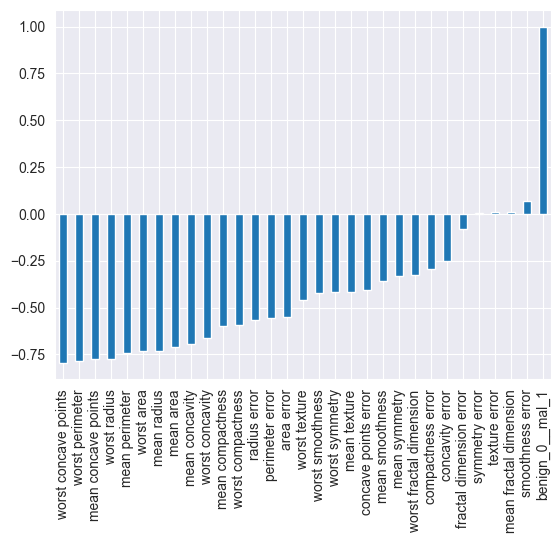

In [5]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

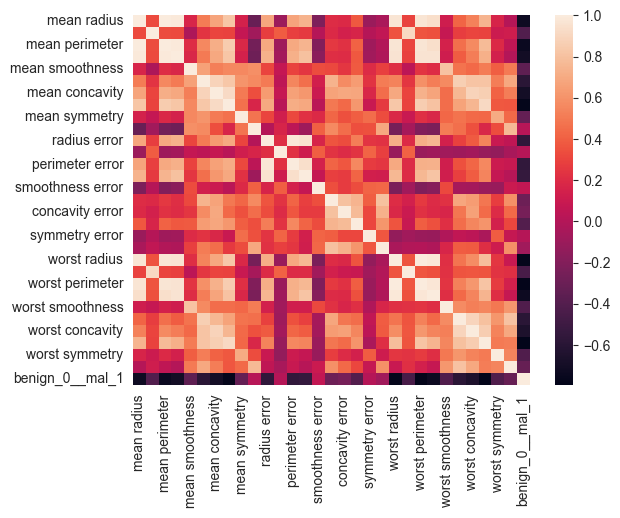

In [6]:
sns.heatmap(df.corr())

In [7]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [13]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#because of binary calssification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [14]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 20ms/step - loss: 0.6971 - val_loss: 0.6735
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6441 - val_loss: 0.6225
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5928 - val_loss: 0.5652
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5352 - val_loss: 0.5052
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4802 - val_loss: 0.4450
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4257 - val_loss: 0.3924
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3734 - val_loss: 0.3380
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3294 - val_loss: 0.2940
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2935 - val_loss: 0.2578
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2634 - val_loss: 0.2296
Epoch 11

<Axes: >

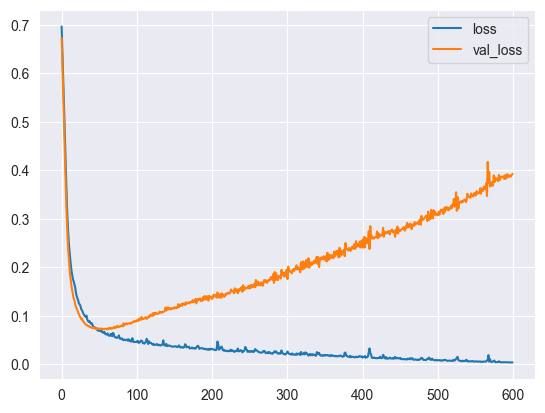

In [15]:
pd.DataFrame(model.history.history).plot()

In [16]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#because of binary calssification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [19]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 23ms/step - loss: 0.6683 - val_loss: 0.6378
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6081 - val_loss: 0.5779
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5450 - val_loss: 0.5161
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4881 - val_loss: 0.4592
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4332 - val_loss: 0.4018
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3803 - val_loss: 0.3502
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3358 - val_loss: 0.3023
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2985 - val_loss: 0.2651
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2658 - val_loss: 0.2386
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2421 - val_loss: 0.2118
Epoch 11

<Axes: >

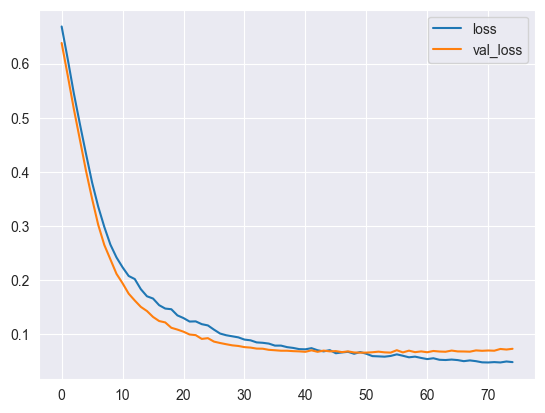

In [20]:
pd.DataFrame(model.history.history).plot()

In [21]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#because of binary calssification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [23]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6633 - val_loss: 0.6436
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6595 - val_loss: 0.6257
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6383 - val_loss: 0.6097
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6315 - val_loss: 0.5922
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6234 - val_loss: 0.5737
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5889 - val_loss: 0.5523
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5823 - val_loss: 0.5232
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5472 - val_loss: 0.4965
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5191 - val_loss: 0.4711
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5058 - val_loss: 0.4443
Epoch 11

<Axes: >

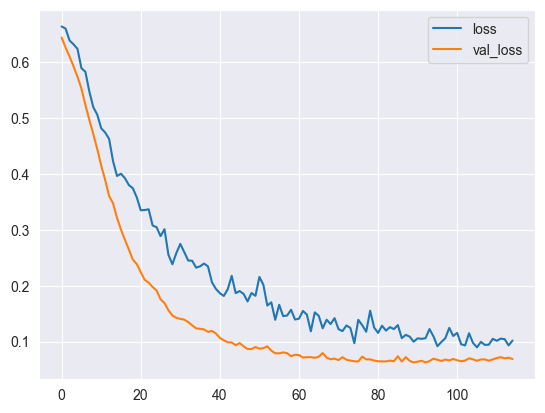

In [24]:
pd.DataFrame(model.history.history).plot()

In [25]:
# y_pred = model.predict(X_test)
# classes = np.argmax(y_pred, axis=1)

classes = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


In [28]:
print(confusion_matrix(y_test, classes))

[[52  2]
 [ 1 88]]
